In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Loading Data Set and Basic Data Exploration

In this part I load dataset with pandas library and do some basic exploration to the dataset. In There we have found that dataset has 405184 rows and 8 columns. There are following columns in the dataset:
          
          1. ts (timestamp) ==> epoch
          2. device id ==> object
          3. CO (Carbon Monoxide) in ppm ==> float64
          4. humidity in percent ==> float64
          5. light ==> bool
          6. LPG (liquified Petroleum Gas) in ppm ==> float64
          7. motion ==> bool
          8. smoke in ppm ==> float64
          9. Temperature in Fahrenheit ==> float64
          
There are no missing value in this datasset. 

In [2]:
path = 'iot_telemetry_data.csv'
dataIot = pd.read_csv(path, index_col='ts')
dataIot.head()

,device,co,humidity,light,lpg,motion,smoke,temp
ts,,,,,,,,
1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [3]:
dataIot.shape

(405184, 8)

In [4]:
dataIot.describe

<bound method NDFrame.describe of                          device        co   humidity  light       lpg  motion  \
ts                                                                              
1.594512e+09  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   False   
1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   False   
1.594512e+09  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   False   
1.594512e+09  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   False   
1.594512e+09  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   False   
...                         ...       ...        ...    ...       ...     ...   
1.595203e+09  00:0f:00:70:91:0a  0.003745  75.300003  False  0.006247   False   
1.595203e+09  b8:27:eb:bf:9d:51  0.005882  48.500000  False  0.008660   False   
1.595203e+09  1c:bf:ce:15:ec:4d  0.004540  75.699997   True  0.007181   False   
1.595203e+09  00:0f:00:70:91:0a  0.003745  75.300003  False  0.006247   Fal

In [5]:
dataIot.info

<bound method DataFrame.info of                          device        co   humidity  light       lpg  motion  \
ts                                                                              
1.594512e+09  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   False   
1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   False   
1.594512e+09  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   False   
1.594512e+09  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   False   
1.594512e+09  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   False   
...                         ...       ...        ...    ...       ...     ...   
1.595203e+09  00:0f:00:70:91:0a  0.003745  75.300003  False  0.006247   False   
1.595203e+09  b8:27:eb:bf:9d:51  0.005882  48.500000  False  0.008660   False   
1.595203e+09  1c:bf:ce:15:ec:4d  0.004540  75.699997   True  0.007181   False   
1.595203e+09  00:0f:00:70:91:0a  0.003745  75.300003  False  0.006247   False

In [35]:
dataIot.isnull().sum()

device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64

# Data Preprocessing

Before analyzing data in to more detail, some preprocessing to make data ready for more detail analysis. remove **motion** column because its only contains False value and assume it can't help to predict result we want. Then encode a label for some columns. There are **device** and **light** columns. It's because the data in device column represent environment condtion that we want to predict. There are the following data on device and the label to represent it.

        1. 00:0f:00:70:91:0a (stable conditions, cooler and more humid) ==> 0
        2. 1c:bf:ce:15:ec:4d (highly variable temperature and humidity) ==> 1
        3. b8:27:eb:bf:9d:51 (stable conditions, warmer and dryer) ==> 2

And for the light column It represent the absence of light by label 0 (False) and 1 (True). It is because data on the light column has boolean data type.

In [36]:
data = dataIot.copy()
data = data.drop(['motion'], axis = 1)
data.head()

,device,co,humidity,light,lpg,smoke,temp
ts,,,,,,,
1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,0.020411,22.700000
1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,0.013275,19.700001
1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,0.020475,22.600000
1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,0.018628,27.000000
1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,0.020448,22.600000


In [37]:
from sklearn.preprocessing import LabelEncoder

encLab = LabelEncoder()
deviceEnc = pd.DataFrame(encLab.fit_transform(data['device']), columns=['condition'])
deviceEnc.index = data.index

dataEnc = pd.concat([data, deviceEnc], axis=1)
dataEnc.head()

,device,co,humidity,light,lpg,smoke,temp,condition
ts,,,,,,,,
1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,0.020411,22.700000,2
1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,0.013275,19.700001,0
1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,0.020475,22.600000,2
1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,0.018628,27.000000,1
1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,0.020448,22.600000,2


In [38]:
encLab2 = LabelEncoder()
lightEnc = pd.DataFrame(encLab2.fit_transform(dataEnc['light']), columns=['lights'])
lightEnc.index = dataEnc.index

dataEnc2 = pd.concat([dataEnc, lightEnc], axis=1)
dataEnc2.head()

,device,co,humidity,light,lpg,smoke,temp,condition,lights
ts,,,,,,,,,
1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,0.020411,22.700000,2,0
1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,0.013275,19.700001,0,0
1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,0.020475,22.600000,2,0
1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,0.018628,27.000000,1,1
1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,0.020448,22.600000,2,0


In [39]:
dataProcessed = dataEnc2.drop(['device', 'light'], axis=1)
dataProcessed.head()

,co,humidity,lpg,smoke,temp,condition,lights
ts,,,,,,,
1.594512e+09,0.004956,51.000000,0.007651,0.020411,22.700000,2,0
1.594512e+09,0.002840,76.000000,0.005114,0.013275,19.700001,0,0
1.594512e+09,0.004976,50.900000,0.007673,0.020475,22.600000,2,0
1.594512e+09,0.004403,76.800003,0.007023,0.018628,27.000000,1,1
1.594512e+09,0.004967,50.900000,0.007664,0.020448,22.600000,2,0


## Data Cleaning

 Removing some columns that high correlation coefficient. Also,  delete outliers in numerical data in dataset. Then, standardize the value of cleaned using standard scaler form scikit learn. 

In [40]:
dataCleanInput = dataProcessed.copy()
removedCol = ['lpg', 'smoke', 'co']

dataCleaned = dataCleanInput.drop(removedCol, axis=1)
dataCleaned.head()

,humidity,temp,condition,lights
ts,,,,
1.594512e+09,51.000000,22.700000,2,0
1.594512e+09,76.000000,19.700001,0,0
1.594512e+09,50.900000,22.600000,2,0
1.594512e+09,76.800003,27.000000,1,1
1.594512e+09,50.900000,22.600000,2,0


In [41]:
Q1 = dataCleaned.quantile(.25)
Q3 = dataCleaned.quantile(.75)
IQR = Q3-Q1
dataClean = dataCleaned[~((dataCleaned<(Q1-1.5*IQR))|(dataCleaned>(Q3+1.5*IQR))).any(axis=1)]
dataClean.head()

,humidity,temp,condition,lights
ts,,,,
1.594512e+09,51.000000,22.700000,2,0
1.594512e+09,76.000000,19.700001,0,0
1.594512e+09,50.900000,22.600000,2,0
1.594512e+09,76.800003,27.000000,1,1
1.594512e+09,50.900000,22.600000,2,0


In [42]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
humidScaled =pd.DataFrame(scaler1.fit_transform(dataClean[['humidity']]), columns=['humid'])
humidScaled.index = dataClean.index
dataClean1 = pd.concat([dataClean, humidScaled], axis=1)
dataClean1.head()

,humidity,temp,condition,lights,humid
ts,,,,,
1.594512e+09,51.000000,22.700000,2,0,-0.839883
1.594512e+09,76.000000,19.700001,0,0,1.346868
1.594512e+09,50.900000,22.600000,2,0,-0.848630
1.594512e+09,76.800003,27.000000,1,1,1.416844
1.594512e+09,50.900000,22.600000,2,0,-0.848630


In [43]:
scaler2 = StandardScaler()
tempScaled =pd.DataFrame(scaler1.fit_transform(dataClean[['temp']]), columns=['temperature'])
tempScaled.index = dataClean1.index
dataClean2 = pd.concat([dataClean1, tempScaled], axis=1)
dataClean2.head()

,humidity,temp,condition,lights,humid,temperature
ts,,,,,,
1.594512e+09,51.000000,22.700000,2,0,-0.839883,0.157192
1.594512e+09,76.000000,19.700001,0,0,1.346868,-1.057423
1.594512e+09,50.900000,22.600000,2,0,-0.848630,0.116705
1.594512e+09,76.800003,27.000000,1,1,1.416844,1.898141
1.594512e+09,50.900000,22.600000,2,0,-0.848630,0.116705


In [44]:
y = dataClean2['condition']
X = dataClean2[['temp', 'humid', 'lights']]
X

,temp,humid,lights
ts,,,
1.594512e+09,22.700000,-0.839883,0
1.594512e+09,19.700001,1.346868,0
1.594512e+09,22.600000,-0.848630,0
1.594512e+09,27.000000,1.416844,1
1.594512e+09,22.600000,-0.848630,0
...,...,...,...
1.595203e+09,19.200001,1.285639,0
1.595203e+09,22.200000,-1.058558,0
1.595203e+09,26.600000,1.320627,1


In [45]:
y

ts
1.594512e+09    2
1.594512e+09    0
1.594512e+09    2
1.594512e+09    1
1.594512e+09    2
               ..
1.595203e+09    0
1.595203e+09    2
1.595203e+09    1
1.595203e+09    0
1.595203e+09    2
Name: condition, Length: 396528, dtype: int32

## Data Splitting

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)


In [47]:
xTrain, xVal, yTrain, yVal = train_test_split(x_train, y_train,test_size=0.2, random_state=0 )

# DecisionTreeClassifier

In [48]:
model1 = DecisionTreeClassifier(random_state=0, max_depth=1)
model1.fit(x_train, y_train)
prediction1 = model1.predict(x_test)
reports1 = classification_report(y_test, prediction1)
conf = confusion_matrix(y_test, prediction1)
print(reports1)

              precision    recall  f1-score   support

           0       0.56      1.00      0.72     22185
           1       0.00      0.00      0.00     19602
           2       0.94      0.99      0.96     37519

    accuracy                           0.75     79306
   macro avg       0.50      0.66      0.56     79306
weighted avg       0.60      0.75      0.66     79306



In [49]:
AC=accuracy_score(y_test, prediction1)
print("Accuracy",AC)

Accuracy 0.74786270900058


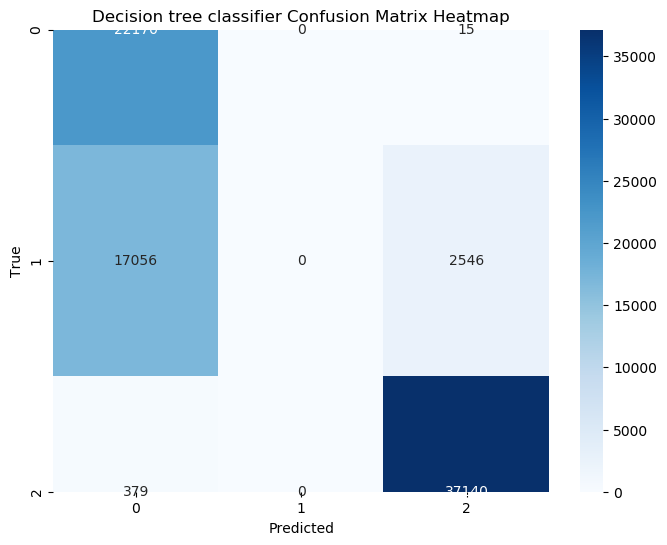

In [50]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision tree classifier Confusion Matrix Heatmap')
plt.show()

# RandomForestClassifier

In [51]:
model = RandomForestClassifier(n_estimators=10,random_state=42, max_depth=1)
model.fit(xTrain, yTrain)
predResult = model.predict(xVal)
report = classification_report(yVal, predResult)
confMat = confusion_matrix(yVal, predResult)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     17765
           1       0.94      1.00      0.97     15616
           2       1.00      0.98      0.99     30064

    accuracy                           0.98     63445
   macro avg       0.98      0.98      0.98     63445
weighted avg       0.98      0.98      0.98     63445



In [52]:
ac=accuracy_score(yVal, predResult)*100
print('Accuracy:',ac)

Accuracy: 98.36551343683504


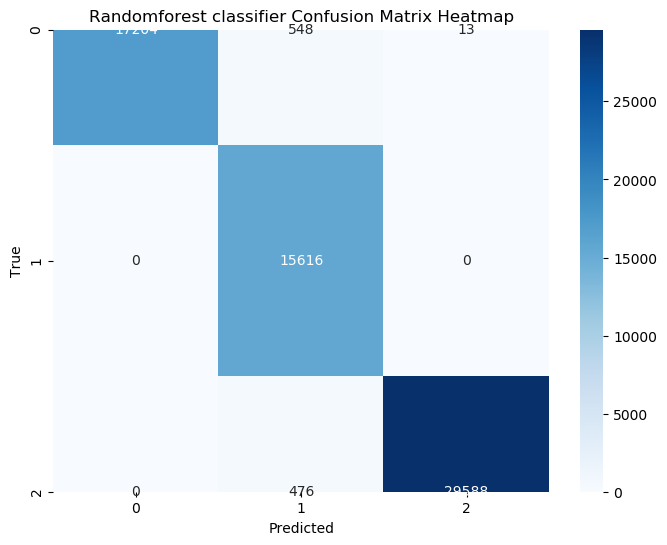

In [53]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confMat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Randomforest classifier Confusion Matrix Heatmap')
plt.show()

In [54]:
#Prediction

In [55]:
#dataset = pd.read_csv(filename)
A='conditions, cooler and more humid'
B='highly variable temperature and humidity'
C='stable conditions, warmer and dryer'

predict = model.predict(x_test.iloc[1:10,:])
for i in range(len(predict)):
    if predict[i] == 0:
        print("{} :{} ".format(dataIot.iloc[i,:],A))
    elif predict[i]== 1:
        print("{} :{} ".format(dataIot.iloc[i, :],B))
    else:
        print("{} :{} ".format(dataIot.iloc[i, :],C))
    

device      b8:27:eb:bf:9d:51
co                 0.00495594
humidity                   51
light                   False
lpg                0.00765082
motion                  False
smoke               0.0204113
temp                     22.7
Name: 1594512094.3859744, dtype: object :conditions, cooler and more humid 
device      00:0f:00:70:91:0a
co                 0.00284009
humidity                   76
light                   False
lpg                0.00511438
motion                  False
smoke               0.0132748
temp                     19.7
Name: 1594512094.7355676, dtype: object :stable conditions, warmer and dryer 
device      b8:27:eb:bf:9d:51
co                 0.00497601
humidity                 50.9
light                   False
lpg                0.00767323
motion                  False
smoke               0.0204751
temp                     22.6
Name: 1594512098.0735726, dtype: object :stable conditions, warmer and dryer 
device      1c:bf:ce:15:ec:4d
co                